In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
#Helper functions
def get_sec_m_h(time_str):
    h, m, s = time_str.split(':')
    h, m, s = int(h), int(m), int(s)
    return (h * 3600 + m * 60 + s, h * 24 + m, h) 

In [3]:
csv_results = 'PlannedVsActual_2018_12_11.csv' #'https://prod-eu1-redash.bringg.com/api/queries/365/results.csv?api_key=DFXd7dfQx0zO7Bk4pqR0xydV5tY8e0BgjbVU7WKV'
df = pd.read_csv(csv_results)

print('Initial Length: ' + str(len(df)))


Initial Length: 96614


In [ ]:
df.columns

In [4]:
groups = df.groupby('task_id')
df_tasks = pd.DataFrame({'inv_count': groups.size(), 'act_order':groups.act_order.max(), 'driver': groups.driver.max(),
                         'team': groups.team_id.min(), 'inventory_etos': groups.inventory_etos.sum(),
                         'lat': groups.lat.min(), 'lng': groups.lng.max(),
                       'opt_in': groups.opt_in.min(), 'opt_out':groups.opt_out.max(),
                       'act_in': groups.act_in.min(), 'act_out':groups.act_out.max(),
                         'cat_1':groups.cat_id.max(),'cat_2':groups.cat_id.min(),
                         'cat_3':groups.cat_id.median()
                      })

In [6]:
df_tasks.loc[df_tasks['inv_count'] == 1, ['cat_2']]= np.nan
df_tasks.loc[df_tasks['inv_count'] <= 2, ['cat_3']]= np.nan

df_tasks.head()

,inv_count,act_order,driver,team,inventory_etos,lat,lng,opt_in,opt_out,act_in,act_out,cat_1,cat_2,cat_3
task_id,,,,,,,,,,,,,,
1584805,1,8,2146.0,131,15.0,48.862621,2.363277,09:17:54,09:22:54,07:52:06,07:52:12,9.0,NaN,NaN
1599561,3,3,407.0,21,35.0,48.895244,2.708810,05:05:14,05:10:14,04:18:48,04:18:54,64.0,18.0,58.0
1619055,3,3,704.0,28,35.0,44.830215,-0.622475,06:51:28,07:11:28,NaN,NaN,64.0,18.0,58.0
1620245,1,1,2684.0,260,20.0,45.741491,4.850886,05:52:09,06:17:09,NaN,NaN,44.0,NaN,NaN
1631834,5,19,373.0,20,80.0,50.585223,2.968836,11:55:44,12:35:00,11:57:01,12:12:41,64.0,44.0,44.0


In [23]:
print('Total number of tasks: ' + str(len(df_tasks)))

print('One item with pickup ' + str(len(df_tasks.loc[(round(df_tasks['cat_1']) == 64.0) & (round(df_tasks['cat_3']) == 58.0), ['cat_2']])))
# Now, lets see if the number of inventory items in the task effects the delay
groups = df_tasks.groupby('inv_count')
result = pd.DataFrame({'count': groups.size()})
#result.sort_values('diff_onsite', inplace=True, ascending=True)
round(result.head(10))

Total number of tasks: 37079
One item with pickup 16436


,count
inv_count,
1,11990
2,3279
3,17278
4,1015
5,973
6,1983
7,108
8,71
9,235


In [22]:
df_tasks[(df_tasks.inv_count == 2) & (df_tasks.cat_2 != df_tasks.cat_1) & (df_tasks.cat_1 == 64.0)]

,inv_count,act_order,driver,team,inventory_etos,lat,lng,opt_in,opt_out,act_in,act_out,cat_1,cat_2,cat_3
task_id,,,,,,,,,,,,,,
1632905,2,17,2148.0,131,20.0,48.824498,2.375052,10:25:09,10:30:09,10:25:26,10:47:54,64.0,9.0,NaN
1632917,2,9,2163.0,131,35.0,48.787935,2.179942,07:40:44,07:45:44,07:40:11,07:45:23,64.0,54.0,NaN
1633052,2,13,2164.0,131,20.0,48.851796,2.268864,08:58:39,09:03:39,08:58:42,09:18:19,64.0,58.0,NaN
1644835,2,17,403.0,21,20.0,48.859503,2.446472,10:46:52,10:51:52,10:45:33,10:46:18,64.0,47.0,NaN
1644979,2,19,394.0,21,15.0,48.871833,2.353629,09:13:34,09:51:00,09:17:26,09:33:54,64.0,23.0,NaN
1645223,2,12,2170.0,131,20.0,48.803965,2.289267,09:00:41,09:05:41,08:12:07,08:20:52,64.0,5.0,NaN
1645225,2,10,2154.0,131,30.0,48.871147,2.280937,09:45:44,09:50:44,09:44:21,09:50:25,64.0,61.0,NaN
1645269,2,16,2179.0,131,20.0,48.859501,2.277576,11:15:51,11:20:51,10:33:21,10:34:19,64.0,53.0,NaN
1658917,2,2,390.0,21,20.0,48.885934,2.532226,08:19:59,08:30:12,06:17:29,08:25:22,64.0,5.0,NaN


In [24]:
len(df_tasks)
df_inventory = df
df =df_tasks

In [26]:
# Data cleaning 
print('Start: ' + str(len(df)))


# Drop incomplete data
df.dropna(subset=['act_in', 'opt_in', 'opt_out', 'act_out', 'cat_1'], inplace=True)
print('After dropping nulls: ' + str(len(df)))

#Add hour column
df['h'] = df.apply(lambda row: get_sec_m_h(row.act_in)[2], axis=1)

# Remove two small teams (3-4 tasks) 
df.drop(df[(df['team']==196) | (df['team']==226) | (df['team']==142)  | (df['team']==215)].index, inplace=True)
print('After removing small teams: ' + str(len(df)))
# Remove the last tasks from request longer then 13 - less then 5% of the data
df.drop(df[df['act_order']>40].index, inplace=True)
print('After removing the last tasks from very long requests: ' + str(len(df)))
# Remove two small teams (3-4 tasks) 
df.drop(df[(df['h']<6) | (df['h']>16)].index, inplace=True)
print('After removing early or late hours: ' + str(len(df)))



Start: 34334
After dropping nulls: 32492
After removing small teams: 32492
After removing the last tasks from very long requests: 32492
After removing early or late hours: 32492


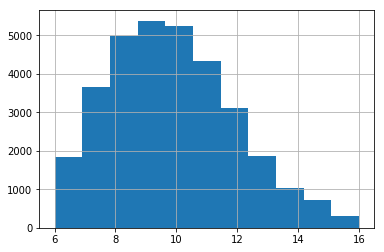

In [28]:
# Histogram of tasks per hour
df.h.hist(bins=11)

In [29]:
df['diff_in'] = df.apply(lambda row: (get_sec_m_h(row.act_in)[0] - get_sec_m_h(row.opt_in)[0])/60, axis=1)
df['diff_out'] = df.apply(lambda row: (get_sec_m_h(row.act_out)[0] - get_sec_m_h(row.opt_out)[0])/60, axis=1)
df['diff_onsite'] = df.diff_out - df.diff_in
df['b_etos'] = df.apply(lambda row: (get_sec_m_h(row.opt_out)[0] - get_sec_m_h(row.opt_in)[0])/60, axis=1)

In [30]:
groups = df.groupby('h')
result = pd.DataFrame({'count': groups.size(), 
                       'mean_diff_in': groups.diff_in.mean(), 'mean_diff_out':groups.diff_out.mean()})

s = 10 
trace0 = go.Scatter(
    x = result.index, y = result.mean_diff_in,
    name = 'Check-in', mode = 'lines+markers',
    marker = dict(size = s,color = 'green')
)

trace1 = go.Scatter(
    x = result.index, y = result.mean_diff_out,
    name = 'Check-out',
    mode = 'lines+markers', marker = dict(size = s, color = 'black')
)

data = [trace0, trace1]

layout = dict(title = 'Mean difference as a function of the Hour', 
              yaxis = dict(zeroline = False), xaxis = dict(zeroline = False))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [31]:
g = df[df['act_order'] < 12].groupby('act_order')
result = pd.DataFrame({'count': g.size(), 'mean_diff_in': g.diff_in.mean(), 'mean_diff_out':g.diff_out.mean()})

s = result['count'] / 180

trace0 = go.Scatter(
    x = result.index, y = result.mean_diff_in,
    name='Checkin', mode ='lines+markers',
    marker = dict(size=s,color='green')
)

trace1 = go.Scatter(
    x = result.index, y = result.mean_diff_out,
    name='Check out',
    mode='lines+markers', 
    marker=dict(size=s, color='red')
)

data = [trace0, trace1]

layout = dict(title = 'Mean difference as a function of place in the sequence of the task in the request', 
              yaxis = dict(zeroline=False), xaxis = dict(zeroline=False))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-line')

In [32]:
# Here we can see the count of tasks for each number in the Sequence
# We can take from it the length of the requests
round(result.head(50))

,count,mean_diff_in,mean_diff_out
act_order,,,
1,806,-4.0,-13.0
2,504,-9.0,-15.0
3,1644,-11.0,-15.0
4,1065,-15.0,-18.0
5,845,-14.0,-20.0
6,1454,-11.0,-15.0
7,1154,-11.0,-18.0
8,1018,-9.0,-17.0
9,1276,-15.0,-18.0


In [33]:
g = df[df['inv_count'] < 10].groupby('inv_count')
result = pd.DataFrame({'count': g.size(), 'mean_diff_in': g.diff_in.mean(), 'mean_diff_out':g.diff_out.mean()})

trace0 = go.Scatter(
    x = result.index, y = result.mean_diff_in,
    name='Checkin', mode ='lines+markers',
    marker = dict(size=11,color='green')
)

trace1 = go.Scatter(
    x = result.index, y = result.mean_diff_out,
    name='Check out',
    mode='lines+markers', 
    marker=dict(size=11, color='red')
)

data = [trace0, trace1]

layout = dict(title = 'Mean difference as a function of the number of inventory items in the request', 
              yaxis = dict(zeroline=False), xaxis = dict(zeroline=False))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-line')

In [34]:
# Now, lets see if the number of inventory items in the task effects the delay
groups = df.groupby('inv_count')
result = pd.DataFrame({'count': groups.size(), 'diff_onsite': groups.diff_onsite.mean(),
                       'diff_in': groups.diff_in.mean(), 'diff_out':groups.diff_out.mean()})
#result.sort_values('diff_onsite', inplace=True, ascending=True)
round(result.head(10))

,count,diff_onsite,diff_in,diff_out
inv_count,,,,
1,9371,-7.0,-11.0,-18.0
2,2849,-12.0,-10.0,-22.0
3,16119,-5.0,-11.0,-17.0
4,939,-20.0,-10.0,-29.0
5,897,-11.0,-15.0,-25.0
6,1826,-12.0,-9.0,-21.0
7,94,-24.0,-9.0,-32.0
8,64,-37.0,-3.0,-40.0
9,207,-12.0,-15.0,-27.0


In [37]:
# Now, lets see if there are teams that stay on site less then predicted
groups = df.groupby('team')
result = pd.DataFrame({'team': groups.team.mean(), 'count': groups.size(), 'diff_onsite': groups.diff_onsite.mean(),
                       'diff_in': groups.diff_in.mean(), 'diff_out':groups.diff_out.mean()})
result.sort_values('diff_onsite', inplace=True, ascending=True)
round(result[result['count'] > 100].head(10))

,team,count,diff_onsite,diff_in,diff_out
team,,,,,
28,28,2166,-17.0,3.0,-14.0
248,248,406,-14.0,-4.0,-19.0
225,225,1403,-14.0,-4.0,-18.0
20,20,749,-12.0,-6.0,-17.0
29,29,164,-10.0,-14.0,-24.0
21,21,11844,-7.0,-13.0,-20.0
131,131,12775,-4.0,-14.0,-19.0
260,260,2405,1.0,-18.0,-17.0
219,219,207,2.0,-14.0,-12.0


In [39]:
groups = df.groupby('driver')
result = pd.DataFrame({'team': groups.team.mean(), 'count': groups.size(), 'diff_onsite': groups.diff_onsite.mean(),
                       'diff_in': groups.diff_in.mean(), 'diff_out':groups.diff_out.mean()})
result.sort_values('count', inplace=True, ascending=False)
round(result[result['count'] > 100].head(10))

,team,count,diff_onsite,diff_in,diff_out
driver,,,,,
704.0,28,727,-16.0,3.0,-13.0
706.0,28,672,-13.0,1.0,-12.0
2684.0,260,627,-9.0,-9.0,-17.0
2502.0,225,584,-12.0,-4.0,-16.0
2685.0,260,499,-1.0,-13.0,-14.0
707.0,28,499,-25.0,4.0,-21.0
2687.0,260,493,7.0,-26.0,-19.0
2503.0,225,481,-15.0,-6.0,-20.0
377.0,21,428,-12.0,-6.0,-18.0


In [40]:
df.columns

Index(['inv_count', 'act_order', 'driver', 'team', 'inventory_etos', 'lat',
       'lng', 'opt_in', 'opt_out', 'act_in', 'act_out', 'cat_1', 'cat_2',
       'cat_3', 'h', 'diff_in', 'diff_out', 'diff_onsite', 'my_b_tos'],
      dtype='object')

In [ ]:
#df.drop(['opt_in', 'act_in','opt_out', 'act_out'], inplace=True, axis=1)
df[['opt_in','opt_out','my_b_tos','bringg_etos']].head()

In [ ]:
import geopandas as gpd
import shapely
df['geo'] = [shapely.geometry.Point(xy) for xy in zip(df.lng, df.lat)]
crs = {'init':'espg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry='geo')

df_france = gpd.read_file('france/France_AL8.shp')
df_join = gpd.sjoin(df_france, gdf, how='inner')

In [ ]:
df_join.drop(['adminlevel', 'status','locname','offname','boundary','wikidata','wikimedia','timestamp','note','rpath','ISO3166_2','country','enname'], inplace=True, axis=1)
round(df_join.describe())

In [ ]:
# Now let us see if we have trafic problems by viewing the areas where drivers late more
groups = df_join.groupby('id')
result = pd.DataFrame({'team': groups.team_id.mean(), 'count': groups.size(), 'mean_onsite': groups.diff_onsite.mean(), 
                       'mean_diff_in': groups.diff_in.mean(), 'mean_diff_out':groups.diff_out.mean(), 
                       'name': groups.name.max()})
result.sort_values('mean_diff_in', inplace=True, ascending=False)
round(result[result['team'] == 28])

In [ ]:
df_geo = pd.merge(result, df_france.loc[ : , ['name', 'geometry']], how='left', on='name')

In [ ]:
gdf_geo = gpd.GeoDataFrame(df_geo)
gdf_geo[gdf_geo['name']=='Paris'].plot()

In [ ]:
import matplotlib.pyplot as plt
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap=’Blues’, linewidth=0.8, ax=ax, edgecolor=’0.8')

In [ ]:
import sys
!{sys.executable} -m pip install gviz_api

In [ ]:
description = {"mean_onsite": ("number", "mean_onsite"),
                 "mean_diff_in": ("number", "mean_diff_in"),
                 "mean_diff_out": ("number", "mean_diff_out")}

data_table = gviz_api.DataTable(description)
data_table.LoadData(result[['mean_onsite', 'mean_diff_in', 'mean_diff_out']].to_dict())

# Create a JavaScript code string.
jscode = data_table.ToJSCode("jscode_data",
                               columns_order=('mean_onsite', 'mean_diff_in', 'mean_diff_out'),
                               order_by="mean_onsite")
# Create a JSON string.
json = data_table.ToJSon(columns_order=('mean_onsite', 'mean_diff_in', 'mean_diff_out'),
                           order_by="mean_onsite")

# Put the JS code and JSON string into the template.
print ("Content-type: text/html")
print()
print (page_template % vars())
df_check[['diff_onsite', 'diff_in', 'diff_out']].describe()

In [ ]:
result[['mean_onsite', 'mean_diff_in', 'mean_diff_out']].to_dict()

In [ ]:
len(df_join)

In [ ]:
import sys

print(sys.executable)